In [623]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#%matplotlib inline

In [624]:
scaler=MinMaxScaler()

In [625]:
data=pd.read_csv('C:/Users/chronis/Desktop/dddata.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python',index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [649]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [626]:

#data.all()
#data=data.set_index('Chance of Admit')

data[['Chance of Admit','GRE Score', 'University Rating','TOEFL Score','SOP','LOR','CGPA','Research']] = scaler.fit_transform(data[['Chance of Admit','GRE Score', 'University Rating','TOEFL Score','SOP','LOR','CGPA','Research']])
data=data.sort_values(by=['Chance of Admit'], ascending=False)
#data.sort_index(inplace=True)
data
#data['GRE Score'].rolling(25).mean().plot()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
203,1.00,1.000000,1.00,0.875,0.875,0.996795,1.0,1.000000
144,1.00,1.000000,0.75,0.875,0.750,1.000000,1.0,1.000000
25,0.92,0.964286,1.00,0.750,0.625,0.961538,1.0,1.000000
204,0.88,1.000000,1.00,0.750,1.000,0.983974,1.0,1.000000
72,0.92,0.714286,1.00,1.000,1.000,0.948718,1.0,0.984127
...,...,...,...,...,...,...,...,...
458,0.10,0.250000,0.00,0.250,0.125,0.246795,0.0,0.047619
95,0.26,0.250000,0.50,0.250,0.375,0.275641,0.0,0.031746
59,0.20,0.250000,0.00,0.500,0.250,0.000000,1.0,0.031746


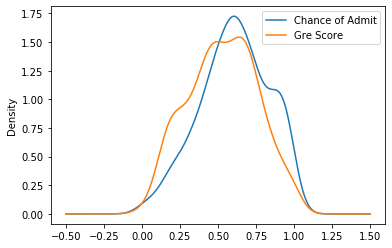

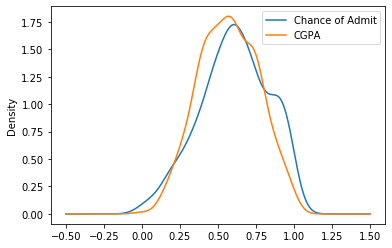

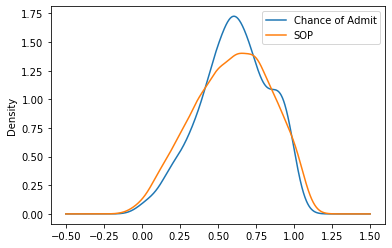

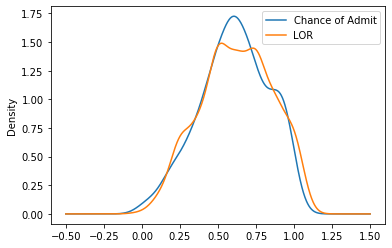

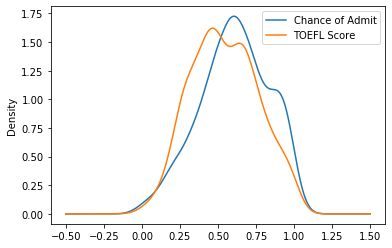

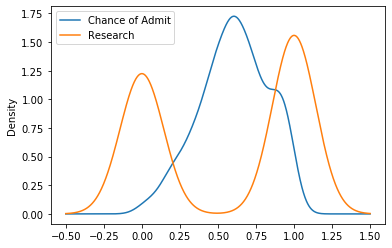

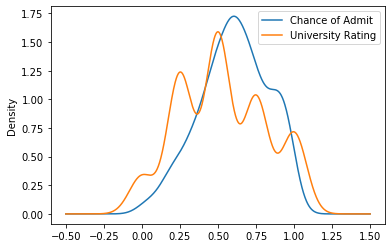

In [627]:
data2=pd.DataFrame({'Chance of Admit': df['Chance of Admit'],'Gre Score': df['GRE Score'],})
data2.plot.kde()
data3=pd.DataFrame({'Chance of Admit': df['Chance of Admit'],'CGPA': df['CGPA'],})
data3.plot.kde()
data3=pd.DataFrame({'Chance of Admit': df['Chance of Admit'],'SOP': df['SOP'],})
data3.plot.kde()
data3=pd.DataFrame({'Chance of Admit': df['Chance of Admit'],'LOR': df['LOR'],})
data3.plot.kde()
data3=pd.DataFrame({'Chance of Admit': df['Chance of Admit'],'TOEFL Score': df['TOEFL Score'],})
data3.plot.kde()
data3=pd.DataFrame({'Chance of Admit': df['Chance of Admit'],'Research': df['Research'],})
data3.plot.kde()
data3=pd.DataFrame({'Chance of Admit': df['Chance of Admit'],'University Rating': df['University Rating'],})
data3.plot.kde()

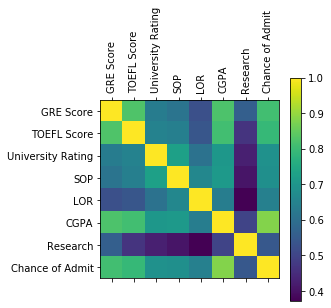

<Figure size 1224x576 with 0 Axes>

In [647]:
plt.matshow(data.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.xticks(rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.figure(figsize=(17,8))

plt.show()

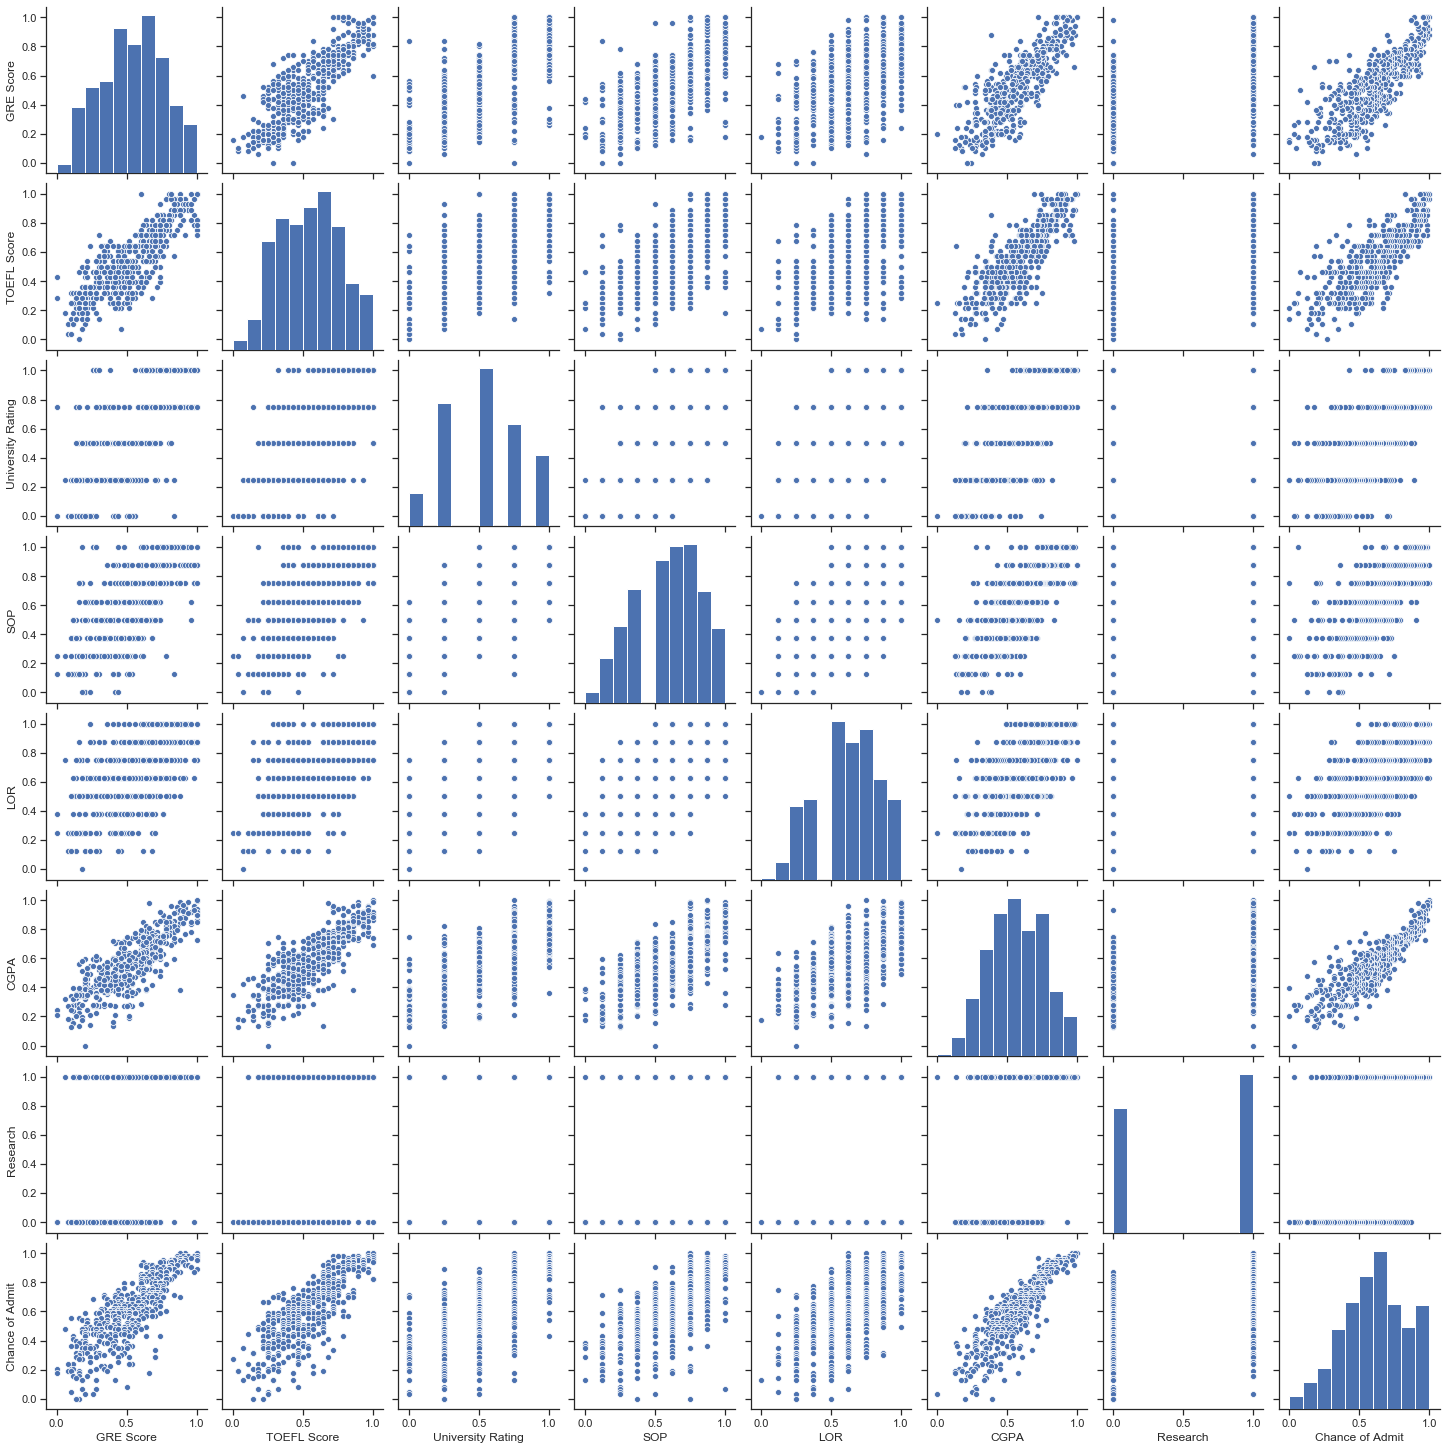

In [648]:
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

In [628]:
import sklearn
from sklearn import svm,preprocessing


In [629]:
df=sklearn.utils.shuffle(data)
X=df.drop('Chance of Admit', axis=1).values
X=preprocessing.scale(X)
y=df['Chance of Admit'].values

test_size=100

X_train=X[:-test_size]
y_train=y[:-test_size]

X_test=X[-test_size:]
y_test=y[-test_size:]

clf=svm.SVR(kernel="linear")
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
#df.plot(kind='scatter', x='Chance of Admit',y='CGPA',figsize=(6,6))

0.7777804719895238

In [630]:
for X,y in zip(X_test, y_test):
    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")
    

Model: 0.4919095403358337, Actual: 0.6031746031746031
Model: 0.4530411149412369, Actual: 0.6190476190476192
Model: 0.8014281741656079, Actual: 0.6984126984126985
Model: 0.648168979746451, Actual: 0.6507936507936508
Model: 0.9487990194848736, Actual: 0.9841269841269843
Model: 0.7297201487006514, Actual: 0.761904761904762
Model: 0.5269595329616467, Actual: 0.4285714285714286
Model: 0.4485139217859625, Actual: 0.3015873015873016
Model: 0.7627517145117398, Actual: 0.7777777777777778
Model: 0.37924128628720066, Actual: 0.47619047619047616
Model: 0.7212752584296728, Actual: 0.761904761904762
Model: 0.4381039478946641, Actual: 0.5238095238095238
Model: 0.7016096285530732, Actual: 0.6666666666666669
Model: 0.2177641027467293, Actual: 0.17460317460317454
Model: 0.40734831529189475, Actual: 0.4444444444444444
Model: 0.6114313484946569, Actual: 0.6825396825396827
Model: 0.6204845195015628, Actual: 0.6190476190476192
Model: 0.5967943553770377, Actual: 0.634920634920635
Model: 0.7629629469911575, A

In [631]:
predictions2=clf.predict(X_test)


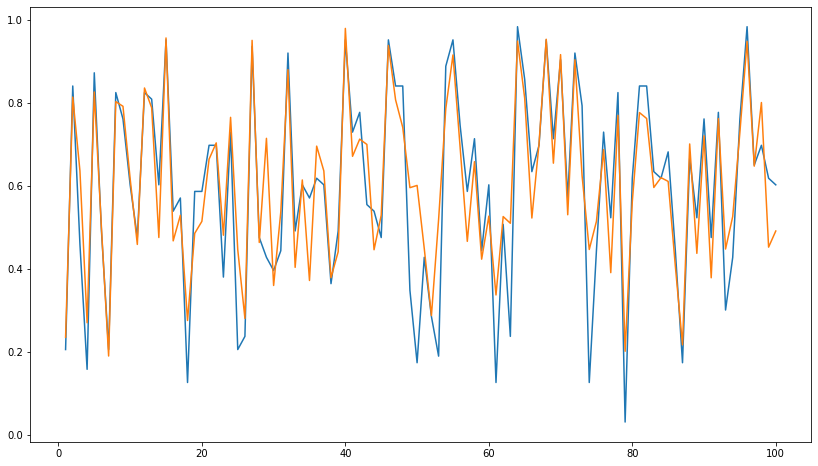

In [632]:
predictions2=clf.predict(X_test)
#plt.plot(predictions2)
#predictions = scaler.inverse_transform(predictions)
x1 = np.linspace(100, 1, 100)
x2 = np.linspace(100, 1, 100)
train = df[:399]
valid = df[399:]
#data.loc[401:,'Chance of Admit']
#plt.scatter(predictions2,data.loc[401:,'Chance of Admit'])
#plt.plot(data[:,'chance of Admit'])
plt.figure(figsize=(14,8))
#plt.plot(x1, data.loc[401:,'Chance of Admit'], label='Original Data')
plt.plot(x1,y_test)
plt.plot(x2, predictions2,label='Predictions')
plt.show()